In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
df = pd.read_csv('C:\\Users\\84346\\Desktop\\Data\\heart.csv')

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'chelesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_included_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [6]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,chelesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
#Xóa bỏ các cột dữ liệu có giá trị null
df.dropna(axis = 1)

,age,sex,chest_pain_type,resting_blood_pressure,chelesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   chest_pain_type           303 non-null    int64  
 3   resting_blood_pressure    303 non-null    int64  
 4   chelesterol               303 non-null    int64  
 5   fasting_blood_sugar       303 non-null    int64  
 6   rest_ecg                  303 non-null    int64  
 7   max_heart_rate_achieved   303 non-null    int64  
 8   exercise_included_angina  303 non-null    int64  
 9   st_depression             303 non-null    float64
 10  st_slope                  303 non-null    int64  
 11  num_major_vessels         303 non-null    int64  
 12  thalassemia               303 non-null    int64  
 13  target                    303 non-null    int64  
dtypes: float64

In [9]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,chelesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_included_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<AxesSubplot:>

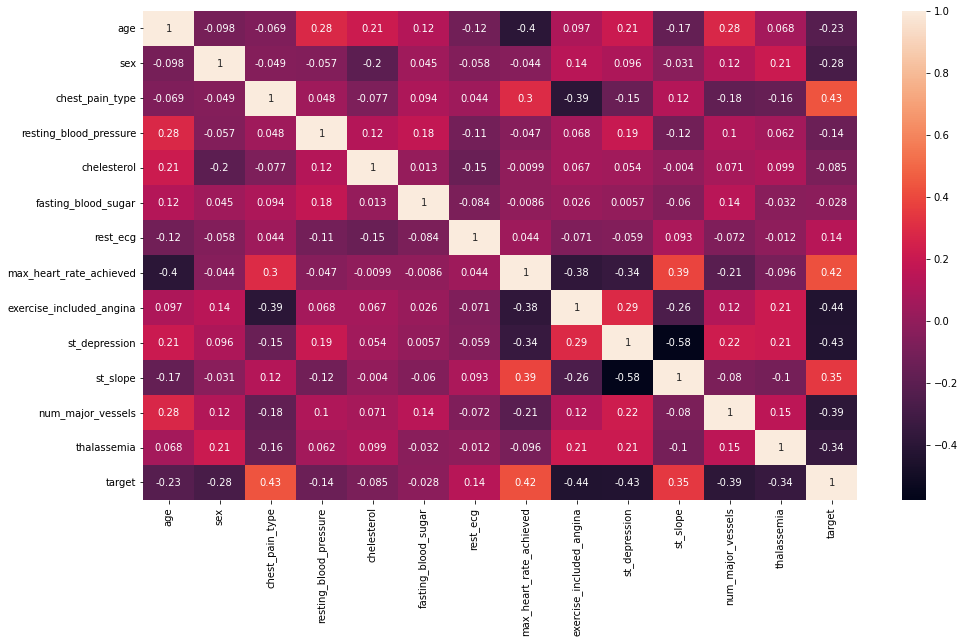

In [10]:
#Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [11]:
#Trong đồ thị này, màu càng đậm chứng tỏ độ tương đồng càng thấp

In [12]:
#Tách các cột dữ liệu thành hai phần, một phần chưa các thuộc tính bình thường và một phần chứa riêng thuộc tính quyết định
features = df.drop('target', axis = 1)
labels = df['target']

In [13]:
#Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện
#Xác định thuộc tính không phải dạng số trong biến features bằng câu lệnh sau
features.select_dtypes(exclude = ['int64']).columns

Index(['st_depression'], dtype='object')

In [14]:
#Kết hợp câu lệnh get_dummies của thư viện pandas để chuyển đổi các cột này về dạng one-hot vector
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,sex,chest_pain_type,resting_blood_pressure,chelesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_included_angina,st_slope,...,st_depression_3.2,st_depression_3.4,st_depression_3.5,st_depression_3.6,st_depression_3.8,st_depression_4.0,st_depression_4.2,st_depression_4.4,st_depression_5.6,st_depression_6.2
0,63,1,3,145,233,1,0,150,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37,1,2,130,250,0,1,187,0,0,...,0,0,1,0,0,0,0,0,0,0
2,41,0,1,130,204,0,0,172,0,2,...,0,0,0,0,0,0,0,0,0,0
3,56,1,1,120,236,0,1,178,0,2,...,0,0,0,0,0,0,0,0,0,0
4,57,0,0,120,354,0,1,163,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,0,0,0,0,0,0,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1,...,0,0,0,0,0,0,0,0,0,0
300,68,1,0,144,193,1,1,141,0,1,...,0,1,0,0,0,0,0,0,0,0
301,57,1,0,130,131,0,1,115,1,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu
x_train , x_test ,y_train ,y_test = train_test_split(features_onehot, labels,test_size=0.3, random_state=42)

In [16]:
#Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn.
#Để xây dựng cây ID3 thì ta thực hiện câu lệnh sau
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [17]:
#Sau khi xây dựng xong cây ID3, tiến hành áp dụng mô hình trên dữ liệu kiểm thử
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.7582417582417582
Report:               precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [18]:
#Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

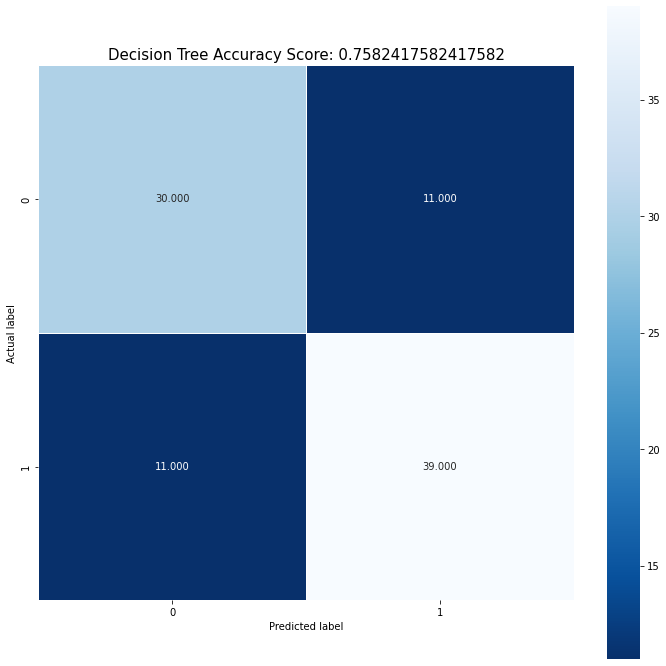

In [19]:
#Biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

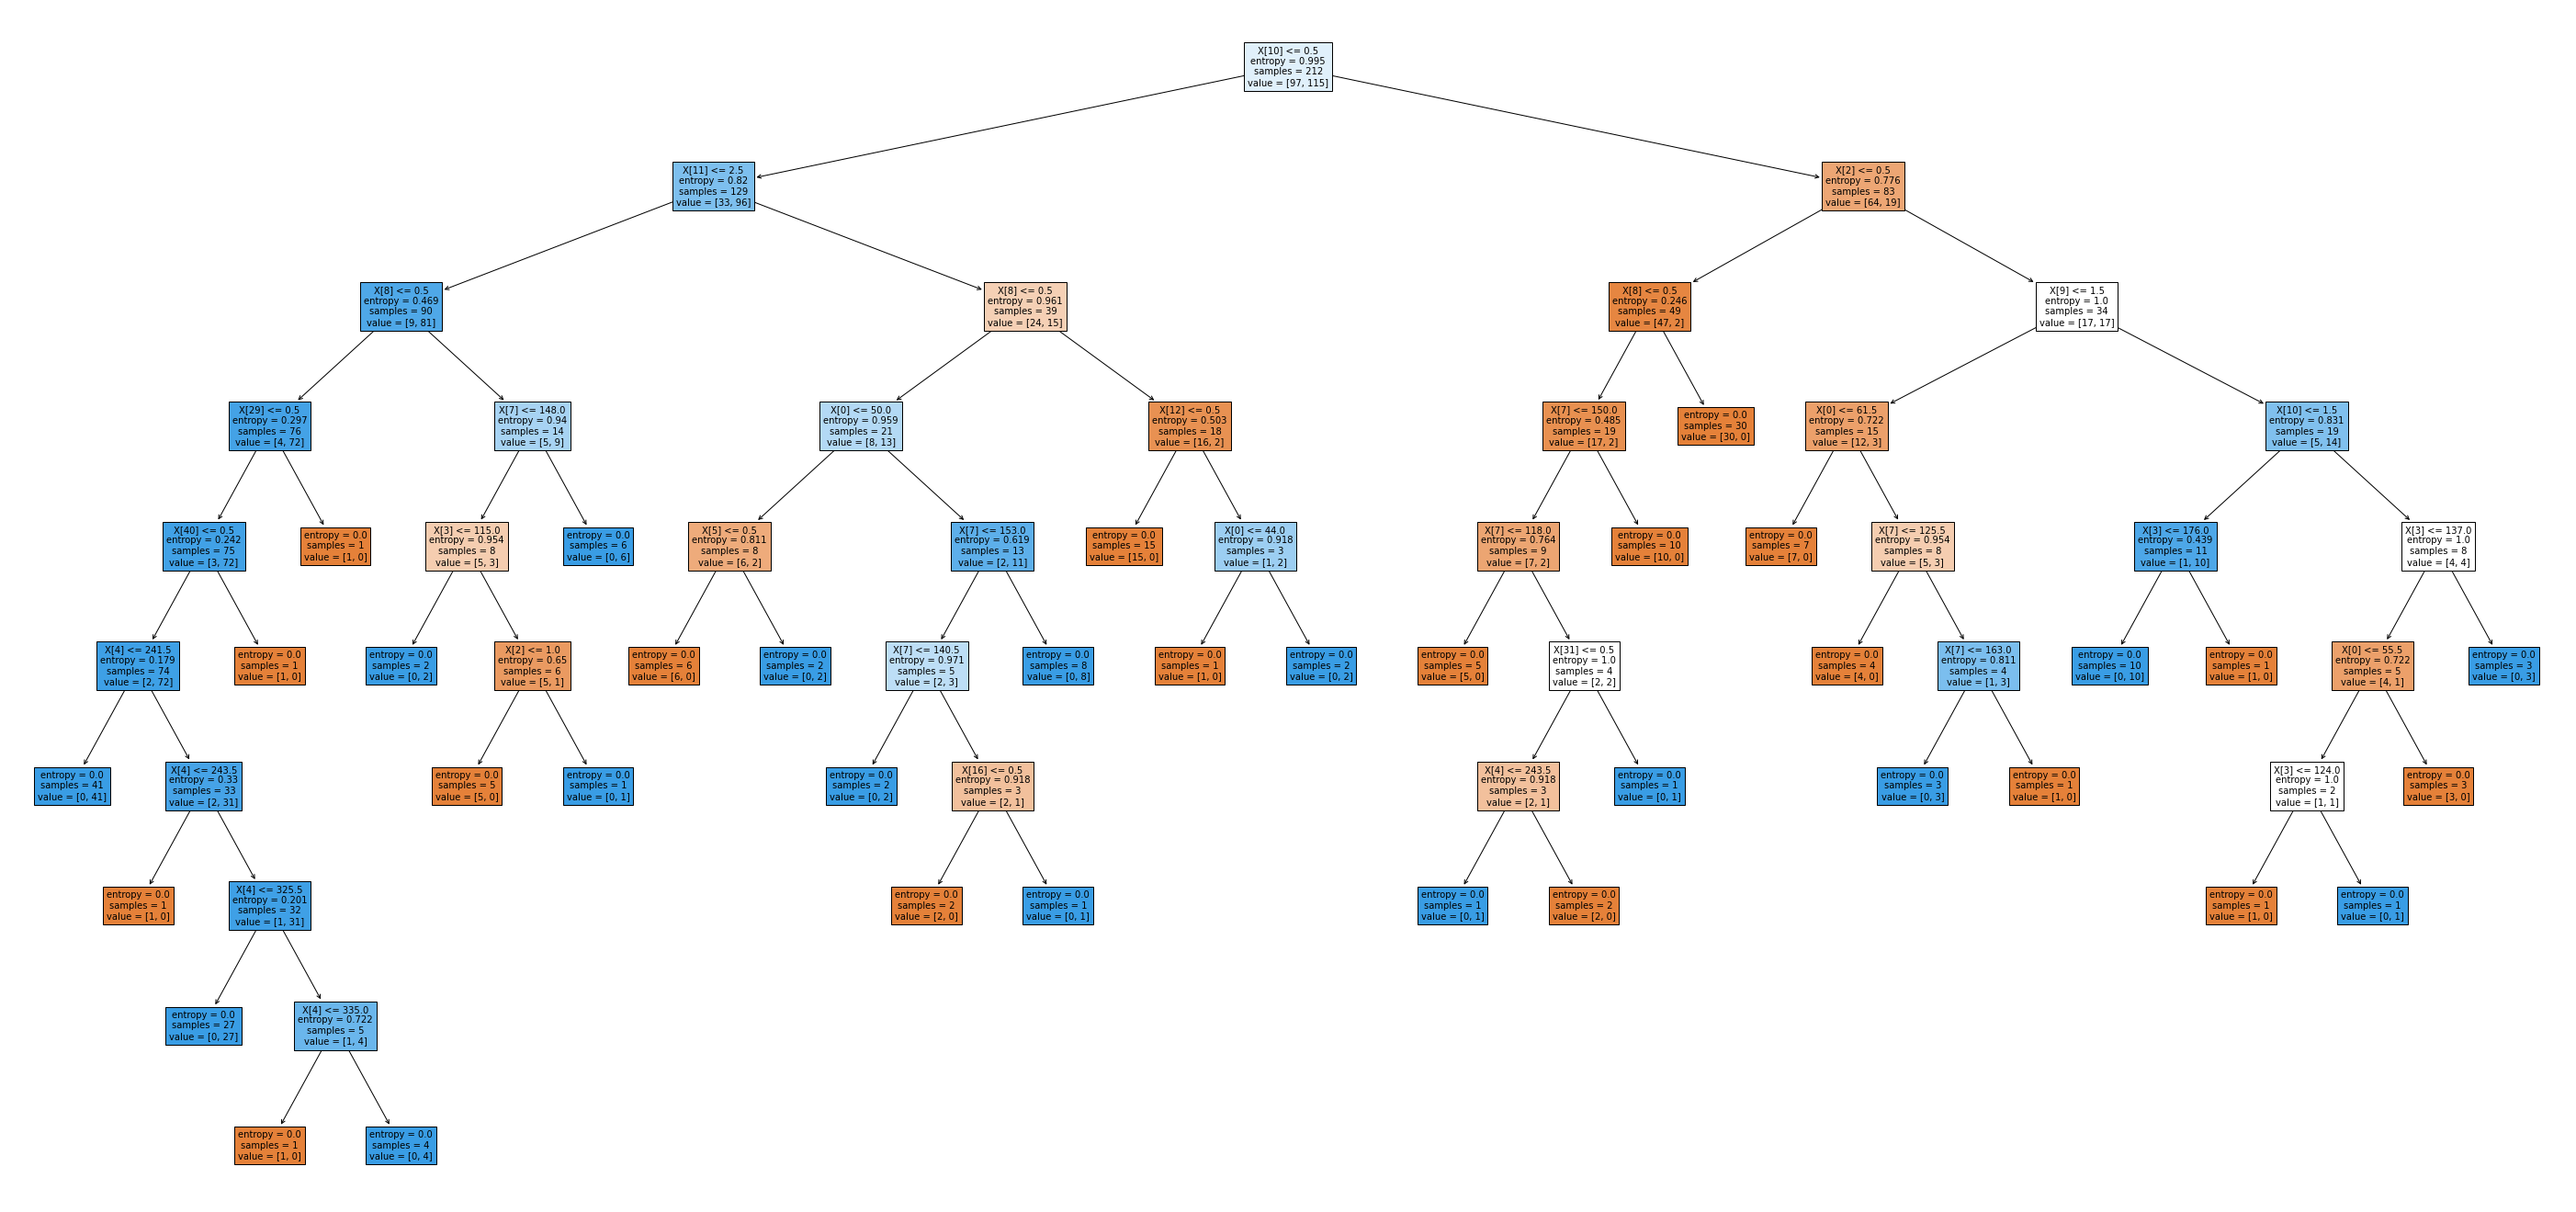

In [20]:
#Biểu diễn cây ID3
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [21]:
#Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
#của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện với giá trị criterion=’gini’.
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
#Sau khi xây dựng xong cây ID3, tiến hành áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.7802197802197802
Report:               precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.81      0.78      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [23]:
#Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

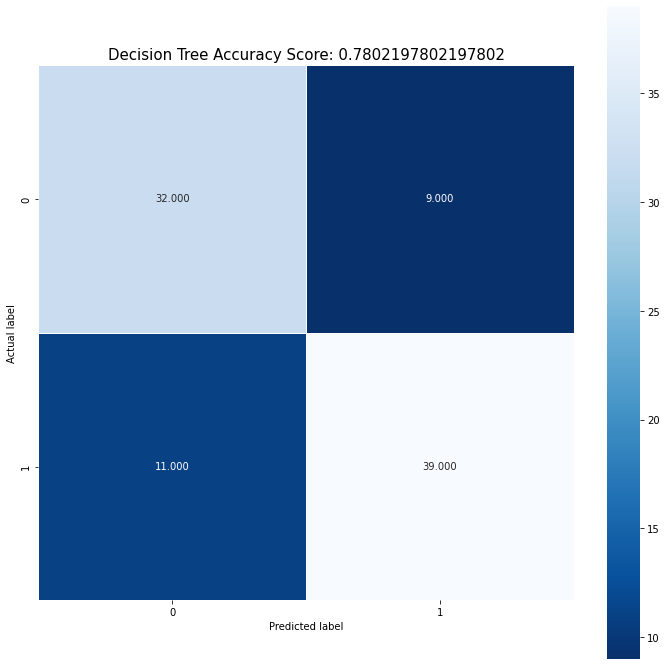

In [24]:
#Biển diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

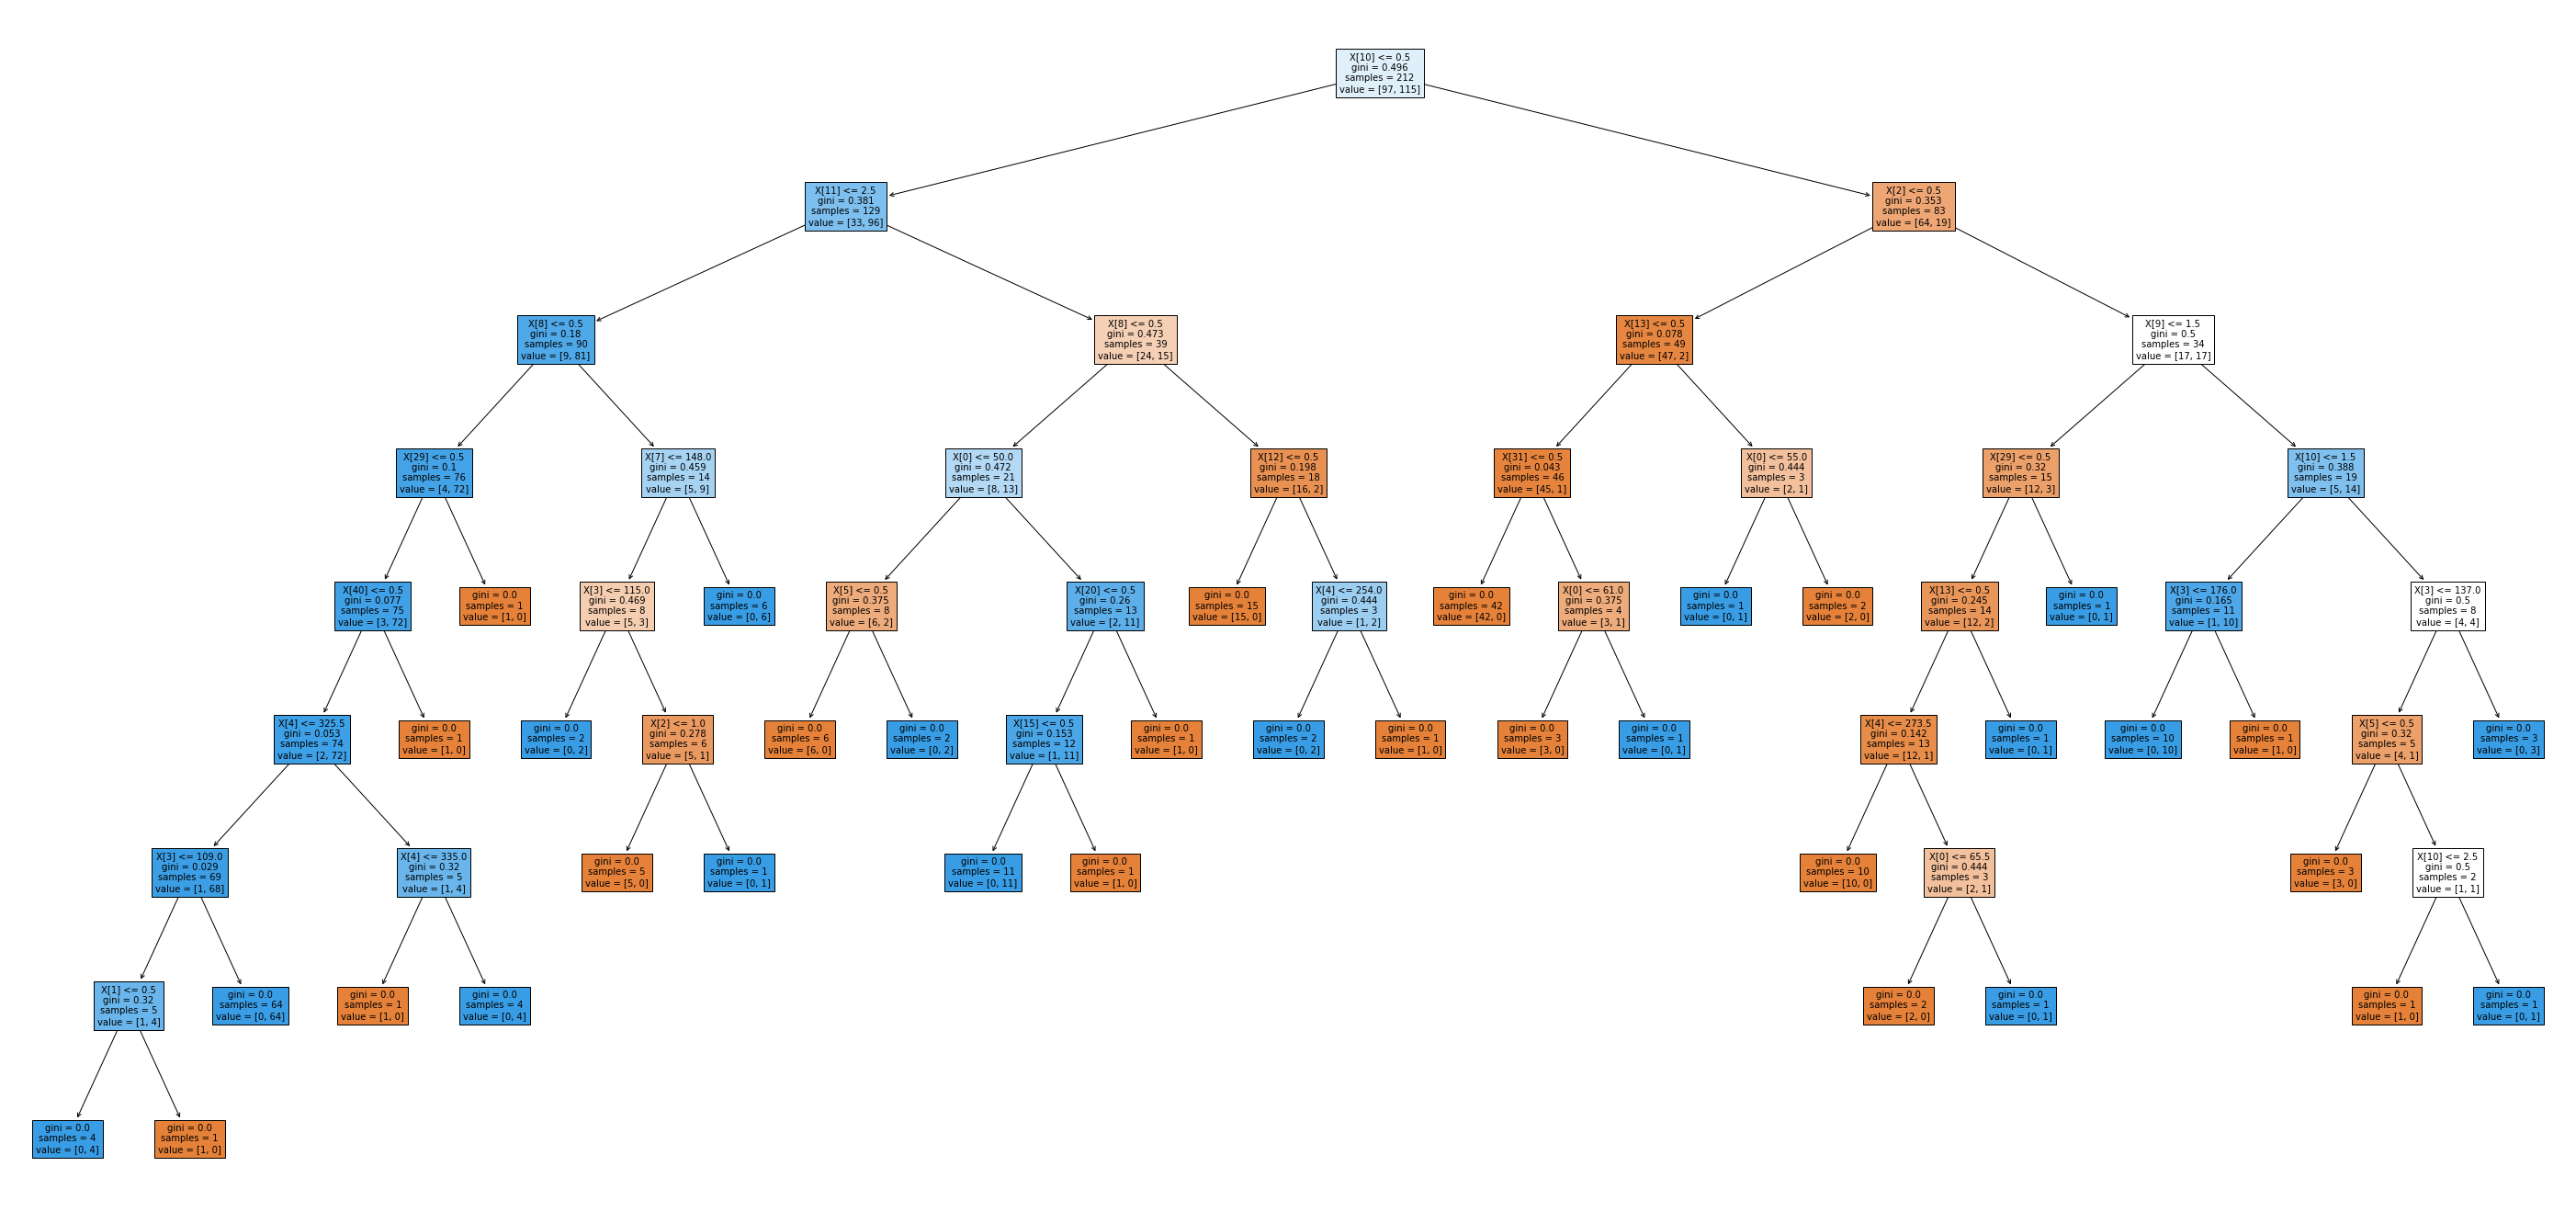

In [25]:
#Biển diễn cây ID3
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [26]:
#Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được.
#Đối với thuật toán Naive Bayes
gnb = GaussianNB ()
bayes_pred = gnb.fit(x_train, y_train).predict(x_test)

In [27]:
#Tính toán các giá trị của mô hình
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.6043956043956044
Report:               precision    recall  f1-score   support

           0       0.67      0.24      0.36        41
           1       0.59      0.90      0.71        50

    accuracy                           0.60        91
   macro avg       0.63      0.57      0.54        91
weighted avg       0.63      0.60      0.55        91



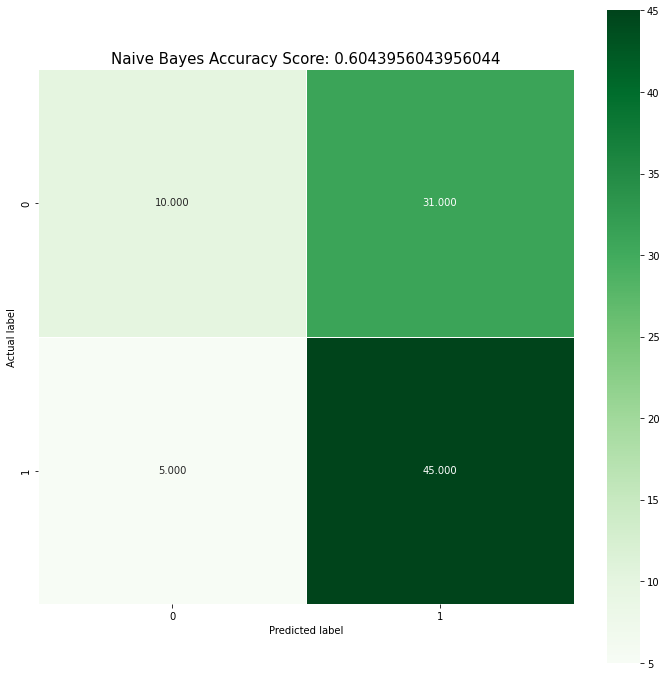

In [28]:
#Biểu diễn ma trận nhầm lẫn bằng đồ thị heatmap
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15); 

# Ta có thể kết luận được mô hình được xây dựng bởi thuật toán Naïve Bayes có độ chính xác cao hơn mô hình cây quyết định theo thuật toán CART.